<a href="https://colab.research.google.com/github/sayyedshoaib/Text-Summerization-using-LLM/blob/main/WebScrappingDataProcessig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analysis Of Data**



> **Installing all the necessary library.**



In [ ]:
!pip install requests
!pip install langchain-huggingface
!pip install huggingface_hub
!pip install pandas
!pip install rouge_score
!pip install bert-score
!pip install wikipedia
!pip install matplotlib
!pip install wordcloud




> **Extracting text from web**



1.Scraping List of physicist

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_physicists"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

content = soup.find('div', {'class': 'mw-parser-output'})

links = {letter: [] for letter in ['A', 'B', 'C', 'D', 'E', 'F']}

# Extract and save the links of physicists whose names start with A, B, C, D, E, F
for li in content.find_all('li'):
    a_tag = li.find('a')
    if a_tag:
        name = a_tag.get_text()
        link = "https://en.wikipedia.org" + a_tag['href']
        first_letter = name[0]
        if first_letter in links and len(links[first_letter]) < 3:
            links[first_letter].append(link)

# Remove the first link with the letter 'A'
if links['A']:
    links['A'].pop(0)

# Ensure there are 3 names from each letter
for li in content.find_all('li'):
    a_tag = li.find('a')
    if a_tag:
        name = a_tag.get_text()
        link = "https://en.wikipedia.org" + a_tag['href']
        first_letter = name[0]
        if first_letter in links and len(links[first_letter]) < 3:
            links[first_letter].append(link)

Link_of_Physicist=[]
for letter, link_list in links.items():
    Link_of_Physicist.append(link_list[0])
    Link_of_Physicist.append(link_list[1])
    Link_of_Physicist.append(link_list[2])
Link_of_Physicist[0] = "https://en.wikipedia.org/wiki/Aryabhata"
Link_of_Physicist[2] = "https://en.wikipedia.org/wiki/Arthur_Eddington"
Link_of_Physicist[16] = "https://en.wikipedia.org/wiki/Felix_Bloch"
Link_of_Physicist.pop()


In [ ]:
print(Link_of_Physicist)

['https://en.wikipedia.org/wiki/Aryabhata', 'https://en.wikipedia.org/wiki/Alexei_Alexeyevich_Abrikosov', 'https://en.wikipedia.org/wiki/Arthur_Eddington', 'https://en.wikipedia.org/wiki/Boyd_Bartlett', 'https://en.wikipedia.org/wiki/Bertram_Brockhouse', 'https://en.wikipedia.org/wiki/Bimla_Buti', 'https://en.wikipedia.org/wiki/Carl_David_Anderson', 'https://en.wikipedia.org/wiki/Cornelis_Bakker', 'https://en.wikipedia.org/wiki/Charles_Glover_Barkla', 'https://en.wikipedia.org/wiki/Derek_Abbott', 'https://en.wikipedia.org/wiki/David_Z_Albert', 'https://en.wikipedia.org/wiki/David_Awschalom', 'https://en.wikipedia.org/wiki/Ernst_Karl_Abbe', 'https://en.wikipedia.org/wiki/Elephter_Andronikashvili', 'https://en.wikipedia.org/wiki/Edward_Victor_Appleton', 'https://en.wikipedia.org/wiki/Franz_Aepinus', 'https://en.wikipedia.org/wiki/Felix_Bloch']


In [ ]:

List_of_scientist = []
for url in Link_of_Physicist:
  name = url.replace("https://en.wikipedia.org/wiki/", "")
  List_of_scientist.append(name)
print(List_of_scientist)




['Aryabhata', 'Alexei_Alexeyevich_Abrikosov', 'Arthur_Eddington', 'Boyd_Bartlett', 'Bertram_Brockhouse', 'Bimla_Buti', 'Carl_David_Anderson', 'Cornelis_Bakker', 'Charles_Glover_Barkla', 'Derek_Abbott', 'David_Z_Albert', 'David_Awschalom', 'Ernst_Karl_Abbe', 'Elephter_Andronikashvili', 'Edward_Victor_Appleton', 'Franz_Aepinus', 'Felix_Bloch']


2.Web scraping using wikipedia library

In [ ]:
import wikipedia

def get_data_of_scientist_wikipedia(url):
  name = url.replace("https://en.wikipedia.org/wiki/", "")
  text = wikipedia.page(name).content
  cleaned_text = ' '.join(text.split())
  return cleaned_text


 3.Web scraping using BS4

In [ ]:
import requests
from bs4 import BeautifulSoup

def extract_text_from_wikipedia_bs4(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        text = soup.get_text(separator=' ')

        clean_text = ' '.join(text.split())

        return clean_text



> **Analyzing Data**



1. Function to number count tokens

In [ ]:
!pip install nltk

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def get_token_count(text):
  tokens = re.findall(r'\b\w+\b', text)
  tokens = word_tokenize(text)
  return len(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2. Function to count unique tokens

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def get_unique_token_count(text):
    tokens = re.findall(r'\b\w+\b', text)
    tokens = word_tokenize(text)
    unique_tokens = set(tokens)
    return len(unique_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3. Function for counting number of appearance of each word

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

def get_each_word_count(text):
  data = text.lower()
  data = re.sub(r'[^\w\s]', '', data)
  words = word_tokenize(data)
  words = [word for word in words if word.isalnum()]
  word_counts = Counter(words)
  return word_counts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4. Generating N-grams

In [ ]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams
def generate_ngrams(text, n):
    # data = data.lower()
    data = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(data)
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    return n_grams


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5. Generating bar graph of number of words.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

def generate_word_bar_graph(data):
  data = data.lower()
  data = re.sub(r'[^\w\s]', '', data)
  words = word_tokenize(data)

  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]

  for word in filtered_words:
    if word.isdigit():
      filtered_words.remove(word)
    elif len(word) < 2:
      filtered_words.remove(word)
  words = [word for word in filtered_words if word.isalnum()]
  word_counts = Counter(words)

  my_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
  my_df.columns = ['Word', 'Count']

  df = my_df.sort_values(by='Count', ascending=False).iloc[:40]
  plt.figure(figsize=(10, 6))
  plt.bar(df['Word'], df['Count'], color='skyblue')
  plt.xlabel('Word')
  plt.ylabel('Count')
  plt.title('Count of top words')
  plt.xticks(rotation=90)
  plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


6. Generating Word Cloud.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_word_cloud(data):
  data = data.lower()
  data = re.sub(r'[^\w\s]', '', data)
  words = word_tokenize(data)

  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]

  for word in filtered_words:
    if word.isdigit():
      filtered_words.remove(word)
    elif len(word) < 2:
      filtered_words.remove(word)
  string = ""
  for word in filtered_words:
    string += word + " "
  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(string)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

7. Line Graph Between Data tokens vs Summary tokens

In [ ]:
#graph between summary token and data token
import pandas as pd
import matplotlib.pyplot as plt

def plot_line_graph(df):
    plt.figure(figsize=(8, 4))
    plt.plot(df['data_token'], df['summary_token'], marker='o', linestyle='-', color='b')
    # plt.scatter(df['data_token'], df['summary_token'])
    plt.xlabel('Data Token')
    plt.ylabel('Summary Token')
    plt.title('Line Plot between Data Token and Summary Token')
    plt.grid(True)
    plt.show()

def plot_scatter_graph(df):
    plt.figure(figsize=(8, 4))
    plt.scatter(df['data_token'], df['summary_token'])
    plt.xlabel('Data Token')
    plt.ylabel('Summary Token')
    plt.title('Line Plot between Data Token and Summary Token')
    plt.grid(True)
    plt.show()

8. Bar Graph between summary token and various scores

In [ ]:
#plotting graph between summary token and scores generated.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def plot_score_graph(df):

    pos = list(range(len(df['summary_token'])))
    width = 0.2

# Plotting the bars
    fig, ax = plt.subplots(figsize=(10, 5))


    plt.bar(pos, df['Rouge - 1 P'], width, alpha=0.5, color='b', label=df['Rouge - 1 P'].name)
    plt.bar([p + width for p in pos], df['Rouge - 1 R'], width, alpha=0.5, color='r', label=df['Rouge - 1 R'].name)
    plt.bar([p + width*2 for p in pos], df['Rouge - 1 F1'], width, alpha=0.5, color='g', label=df['Rouge - 1 F1'].name)


    ax.set_ylabel('Score')

    ax.set_xticks([p + 1.5 * width for p in pos])
    ax.set_xticklabels(df['summary_token'])

    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim(0, 1)

    plt.legend(['Precision', 'Recall', 'Fmeasure'], loc='upper left')
    plt.grid()
    plt.show()





> **Calculating various scores**



1. Rouge Scores

In [ ]:
from rouge_score import rouge_scorer

# Create a scorer for ROUGE-1 and ROUGE-L
def calculate_rouge(reference_summary, candidate_summary):
  scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)
  score = scorer.score(candidate_summary, reference_summary)['rouge1']
  r1score_dict = score._asdict()
  r2score = scorer.score(candidate_summary, reference_summary)['rouge2']
  r2score_dict = score._asdict()
  rlscore = scorer.score(candidate_summary, reference_summary)['rougeL']
  rlscore_dict = score._asdict()
  return [r1score_dict,r2score_dict,rlscore_dict]



2. Blue Score

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure you have the necessary NLTK data
nltk.download('punkt')

def calculate_bleu(reference_summary, candidate_summary):
    # Tokenize the reference and candidate summaries
    reference_tokens = [nltk.word_tokenize(ref) for ref in reference_summary]
    candidate_tokens = nltk.word_tokenize(candidate_summary)

    # Calculate BLEU score
    smoothing_function = SmoothingFunction().method1
    bleu_score = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=smoothing_function)

    return bleu_score

# bleu_score = calculate_bleu(reference_summary[0], aryabhata_summary)
# print(f"BLEU score: {bleu_score:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3. Meteor score

In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score

# Ensure you have the necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

def calculate_meteor(reference_summary, candidate_summary):
    # Calculate METEOR score
    reference_tokens = [nltk.word_tokenize(ref) for ref in reference_summary]
    candidate_tokens = nltk.word_tokenize(candidate_summary)
    score = meteor_score(reference_tokens, candidate_tokens)
    return score

# meteor_score_value = calculate_meteor(reference_summary[0], aryabhata_summary)
# print(f"METEOR score: {meteor_score_value:.4f}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


4. BERTScore

In [ ]:
from bert_score import score

def calculate_bertscore(reference_summary, candidate_summary, lang='en'):
    # Calculate BERTScore
    P, R, F1 = score([candidate_summary], [reference_summary], lang=lang)
    return P.mean().item(), R.mean().item(), F1.mean().item()

# precision, recall, f1 = calculate_bertscore(reference_summary[0], aryabhata_summary)
# print(f"BERTScore - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")




> **Generating Summary Using LLM**



Intializing LLM

In [ ]:
from google.colab import userdata
sec_key=userdata.get("HF_TOKEN")

from langchain_huggingface import HuggingFaceEndpoint

import os
os.environ["HUGGING_FACE"]=sec_key

In [ ]:
repo_id="mistralai/Mistral-7B-Instruct-v0.3"
llm=HuggingFaceEndpoint(repo_id=repo_id,max_length=250,token=sec_key,temperature=0.4,timeout=300)

                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.
                    token was transferred to model_kwargs.
                    Please make sure that token is what you intended.


In [ ]:
llm.invoke("what is machine learning?")

Function To Generate summary

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
template = (
    "You are tasked with extracting specific information from the following text content: {text_data}."
    "Please follow these instructions carefully: \n\n"
    "1. **Extract Information:** Only extract the information that directly matches the provided description: {parse_description}. "
    "2. **No Extra Content:** Do not include any additional text, comments, or explanations in your response. "
    "3. **Empty Response:** If no information matches the description, return an empty python dictionary ."
    "4. **Direct Data Only:** Your output should contain only the data that is explicitly requested, with no other text."
    "**Provide summary in about {words} words."
)
def parse_with_llm(text_chunks, parse_description,input_token):
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | llm

    parsed_results = []

    for i, chunk in enumerate(text_chunks, start=1):
        response = chain.invoke(
            {"text_data": chunk, "parse_description": parse_description,"words":input_token}
        )
        parsed_results.append(response)
    # print("--")
    return parsed_results

In [ ]:
#Splitting the data into chunks
def split_dom_content(dom_content, max_length=6000):
    return [
        dom_content[i : i + max_length] for i in range(0, len(dom_content), max_length)
    ]

In [ ]:
reference_summary = {"Aryabhata":"Aryabhata (476–550 CE) was an ancient Indian mathematician and astronomer. He is known for his work on algebra, trigonometry, and the approximation of π (pi). Aryabhata also proposed the heliocentric theory, suggesting that Earth rotates on its axis. His major work, the Aryabhatiya, covers mathematical and astronomical concepts, greatly influencing future scholars in India and the Islamic world.",
                     "Alexei Alexeyevich Abrikosov":"Alexei Abrikosov (1928–2017) was a Soviet-American theoretical physicist known for his work on superconductivity. He won the Nobel Prize in Physics in 2003 for discovering type-II superconductors, materials that can exhibit superconductivity in strong magnetic fields. His contributions significantly advanced the field of condensed matter physics.",
                     "Sir Arthur Stanley Eddington":"Arthur Eddington (1882–1944) was an English astronomer, physicist, and mathematician known for his work on the theory of general relativity. He led an expedition in 1919 that provided the first experimental confirmation of Einstein's theory. Eddington also made significant contributions to the understanding of stellar structures and astrophysics.",
                     "Boyd Wheeler Bartlett":"Boyd Wheeler Bartlett (1897–1965) was an American military officer, educator, and physicist. He served as head of the physics department at the United States Military Academy and made notable contributions to the field of electromagnetism. During World War II, he introduced a course in atomic physics, earning the Legion of Merit. He also co-authored research papers with physicist Arnold Sommerfeld.",
                     "Bertram Neville Brockhouse":"Bertram Brockhouse was a Canadian physicist known for his pioneering work in the field of neutron scattering. He developed techniques that allowed for the study of atomic and molecular structures using neutrons, contributing significantly to condensed matter physics. In 1994, he was awarded the Nobel Prize in Physics for his innovative contributions.",
                     "Bimla Buti":"Bimla Buti is an Indian physicist renowned for her contributions to theoretical and experimental physics, particularly in the study of condensed matter and nanotechnology. She has made significant strides in understanding magnetic materials and has been instrumental in promoting science education in India. Buti has received numerous awards for her work and mentorship.",
                     "Carl David Anderson":"Carl David Anderson was an American physicist best known for discovering the positron in 1932, which provided crucial evidence for the theory of antimatter. He conducted his research using cloud chambers, and his work earned him the Nobel Prize in Physics in 1936. Anderson also contributed to studies in cosmic rays and high-energy particle physics.",
                     "Cornelis Jan Bakker":"Cornelis Bakker was a Dutch physicist known for his contributions to plasma physics and nuclear fusion research. He played a significant role in advancing the understanding of plasma behavior in various conditions. Bakker's work has influenced both theoretical and experimental aspects of fusion energy, aiming to harness it as a viable energy source.",
                     "Charles Glover Barkla":"Charles Glover Barkla was a British physicist awarded the Nobel Prize in Physics in 1917 for his discovery of characteristic X-rays. His research significantly advanced the understanding of atomic structure and X-ray emissions. Barkla's work laid the groundwork for further studies in X-ray spectroscopy and contributed to the development of quantum mechanics.",
                     "Derek Abbott":"Derek Abbott is an Australian electrical engineer and physicist recognized for his research in areas such as nanotechnology, photonics, and energy harvesting. He has contributed significantly to the development of novel devices and systems, including solar energy technology. Abbott is also involved in education and mentoring, advocating for interdisciplinary approaches in science and engineering.",
                     "David Z. Albert":"David Z. Albert is an American theoretical physicist and philosopher known for his work in quantum mechanics and the philosophy of time. He has explored the implications of quantum theory on our understanding of reality, particularly concerning the nature of time and causality. Albert is also a prominent advocate for scientific literacy and public engagement with science.",
                     "David D. Awschalom":"David Awschalom is an American physicist recognized for his pioneering research in quantum information science and spintronics. He has made significant contributions to the understanding of quantum coherence and its applications in solid-state systems. Awschalom's work has implications for the development of quantum computing and advanced materials, enhancing the field's interdisciplinary nature.",
                     "Ernst Karl Abbe":"Ernst Karl Abbe was a German physicist and optician renowned for his contributions to optical theory and microscopy. He developed the Abbe sine condition, which improved the resolution of microscopes. Co-founder of the Zeiss company, Abbe also emphasized the importance of scientific research and education, significantly influencing optical instrument design and manufacturing.",
                     "Elephter Andronikashvili":"Elephter Andronikashvili was a Georgian physicist known for his work in the field of low-temperature physics and the properties of liquid helium. He made significant contributions to understanding superfluidity, particularly through his experiments that explored the behavior of helium at extremely low temperatures. His research has had lasting impacts on condensed matter physics.",
                     "Sir Edward Victor Appleton":"Edward Victor Appleton was a British physicist awarded the Nobel Prize in Physics in 1947 for his pioneering work on the ionosphere. He developed methods to study its structure and properties using radio waves, significantly advancing the understanding of atmospheric physics. Appleton's research laid the groundwork for modern telecommunications and radio navigation systems.",
                     "Franz Ulrich Theodor Aepinus":"Franz Aepinus was a German physicist and mathematician known for his early work in electromagnetism and electrostatics. He is recognized for formulating the concept of electric potential and contributing to the understanding of magnetic and electric fields. Aepinus's theories laid important groundwork for later developments in physics, particularly in the study of electromagnetism.",
                     "Felix Bloch":"Felix Bloch was a Swiss physicist who made significant contributions to quantum mechanics and nuclear magnetic resonance (NMR). He shared the 1952 Nobel Prize in Physics with Edward Purcell for their independent discovery of NMR, a technique widely used in medical imaging and chemistry."}
def get_reference_summary(name):
  for key, value in reference_summary.items():
    if key == name:
      return value
  return ""

**Main Function**

In [ ]:
import pandas as pd
import json

description = """extract the information from the given data and represent output in a json format having following key:
Title: The title of the Data (Wikipedia page).
Summary: A brief summary or introduction section of the Data(Wikipedia  page).
works: Scientific field in which that scientist worked (this field shoud be in string).

sample output:
{
"Title": "Albert Einstein",
"Summary": "Albert Einstein was a German-born theoretical physicist who developed the theory of relativity, one of the two pillars of modern physics. His work is also known for its influence on the philosophy of science.",
"works": "theoretical physicist"
}
"""

def main_function():
  df = pd.DataFrame()
  input_token = 40
  for name in List_of_scientist:

    data = get_data_of_scientist_wikipedia(name)
    dom_chunks = split_dom_content(data)
    result = parse_with_llm(dom_chunks,description,input_token)

    text = result[0]

    newstring = ""
    for i in text:
      if(i != '{'):
        newstring += i
      else:
        break

    text = text.split(newstring, 1)[1]
    text = text.replace('\n', '').replace('`', '').strip()
    print(text)

    if text:
      try:
        dict_ = json.loads(text)

        data_token = get_token_count(data)
        summary_token = get_token_count(dict_['Summary'])

        title = dict_['Title']
        dict_['data_token'] = data_token
        dict_['summary_token'] = summary_token

        rouge_score = calculate_rouge(reference_summary[title], dict_['Summary'])
        dict_['Rouge - 1 P'] = rouge_score[0]['precision']
        dict_['Rouge - 1 R'] = rouge_score[0]['recall']
        dict_['Rouge - 1 F1'] = rouge_score[0]['fmeasure']

        dict_['Rouge - 2 P'] = rouge_score[1]['precision']
        dict_['Rouge - 2 R'] = rouge_score[1]['recall']
        dict_['Rouge - 2 F1'] = rouge_score[1]['fmeasure']

        dict_['Rouge - L P'] = rouge_score[2]['precision']
        dict_['Rouge - L R'] = rouge_score[2]['recall']
        dict_['Rouge - L F1'] = rouge_score[2]['fmeasure']


        pb, rb, f1b = calculate_bertscore(reference_summary[title], dict_['Summary'])
        dict_['Bleu_Precision'] = pb
        dict_['Bleu_Recall'] = rb
        dict_['Bleu_F1'] = f1b

        meteor_score_value = calculate_meteor(reference_summary[title], dict_['Summary'])
        dict_['Meteor_Score'] = meteor_score_value

        bleu_score = calculate_bleu(reference_summary[title], dict_['Summary'])
        dict_['Bleu_Score'] = bleu_score

        new_df = pd.DataFrame([dict_])
        df = pd.concat([df, new_df], ignore_index=True)

      except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        print(f"Text causing the error: {text}")
    else:
      print("Text is empty after processing.")

  return df

In [ ]:
result = main_function()
print(result)
result.to_csv('result.csv')



> **Testing above functions**



In [ ]:
import json

name = 'Aryabhata'
data = get_data_of_scientist_wikipedia(name)
dom_chunks = split_dom_content(data)
result = parse_with_llm(dom_chunks,description,40)

text = result[0]

newstring = ""
for i in text:
  if(i != '{'):
    newstring += i
  else:
    break

text = text.split(newstring, 1)[1]
text = text.replace('\n', '').replace('`', '').strip()
my_dict = json.loads(text)
summary_test = my_dict['Summary']

data_token = get_token_count(data)
summary_token = get_token_count(summary_test)
print(data_token)
print(summary_token)

4009
37


In [ ]:
print(generate_ngrams(data,2))
print(generate_ngrams(summary_test,2))

[('Aryabhata', 'ISO'), ('ISO', 'Āryabhaṭa'), ('Āryabhaṭa', 'or'), ('or', 'Aryabhata'), ('Aryabhata', 'I'), ('I', '476550'), ('476550', 'CE'), ('CE', 'was'), ('was', 'the'), ('the', 'first'), ('first', 'of'), ('of', 'the'), ('the', 'major'), ('major', 'mathematicianastronomers'), ('mathematicianastronomers', 'from'), ('from', 'the'), ('the', 'classical'), ('classical', 'age'), ('age', 'of'), ('of', 'Indian'), ('Indian', 'mathematics'), ('mathematics', 'and'), ('and', 'Indian'), ('Indian', 'astronomy'), ('astronomy', 'His'), ('His', 'works'), ('works', 'include'), ('include', 'the'), ('the', 'Āryabhaṭīya'), ('Āryabhaṭīya', 'which'), ('which', 'mentions'), ('mentions', 'that'), ('that', 'in'), ('in', '3600'), ('3600', 'Kali'), ('Kali', 'Yuga'), ('Yuga', '499'), ('499', 'CE'), ('CE', 'he'), ('he', 'was'), ('was', '23'), ('23', 'years'), ('years', 'old'), ('old', 'and'), ('and', 'the'), ('the', 'Aryasiddhanta'), ('Aryasiddhanta', 'For'), ('For', 'his'), ('his', 'explicit'), ('explicit', 'me

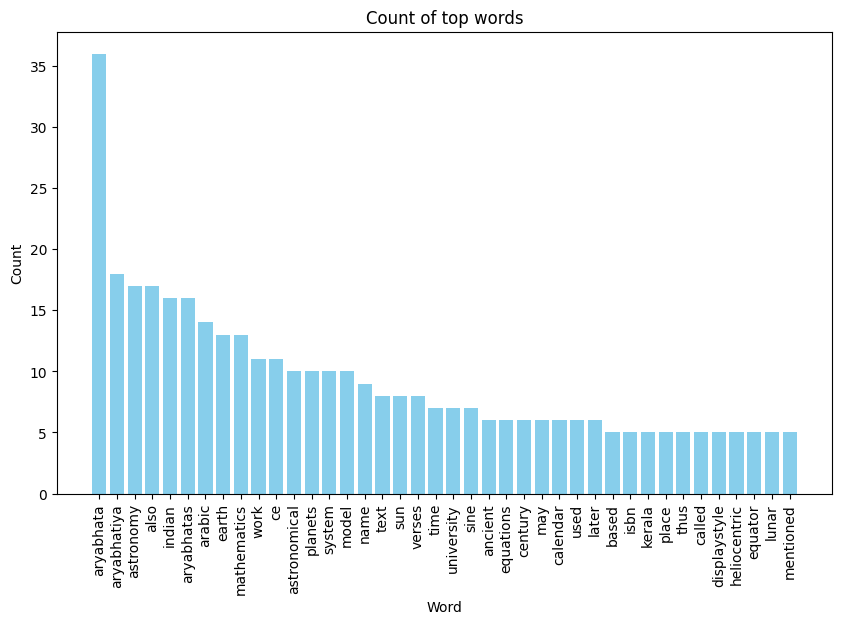

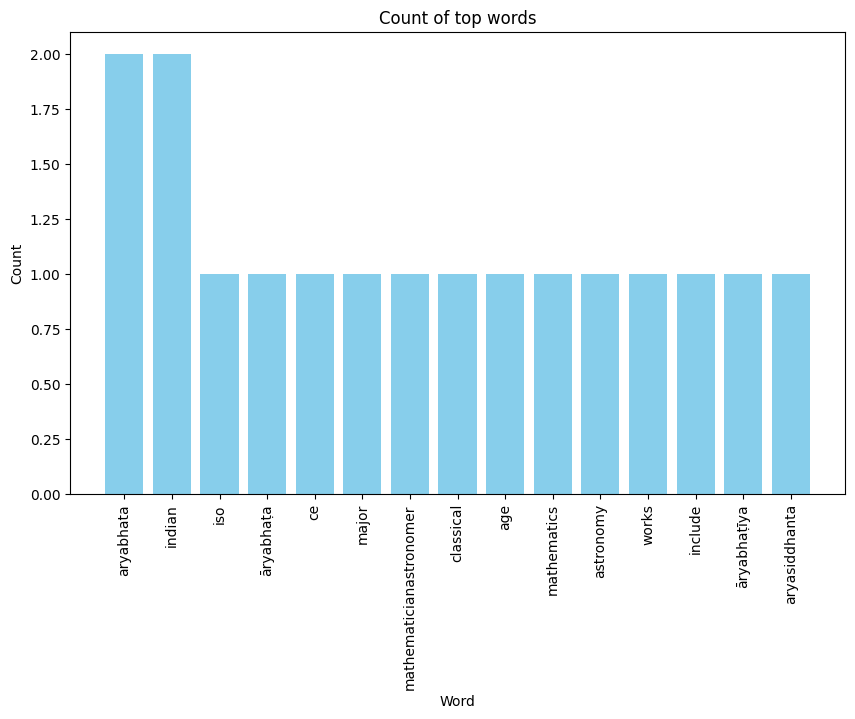

In [ ]:
generate_word_bar_graph(data)
generate_word_bar_graph(summary_test)

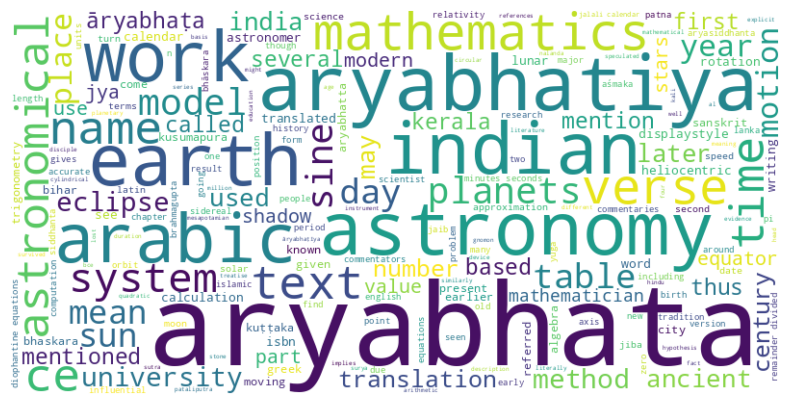

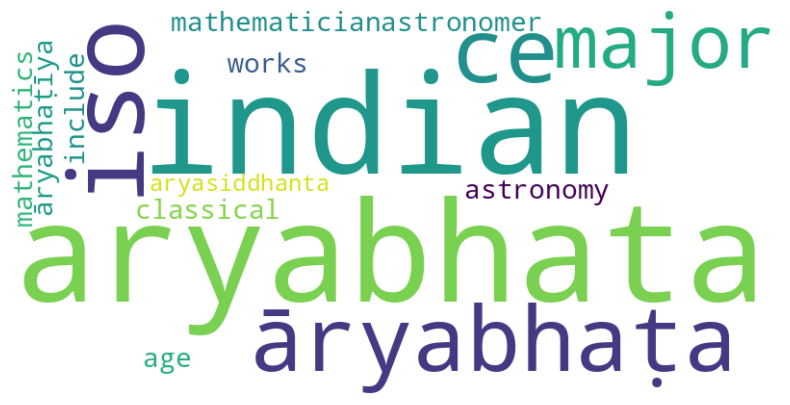

In [ ]:
generate_word_cloud(data)
generate_word_cloud(summary_test)

In [ ]:
import pandas as pd
df = pd.read_csv('result.csv')

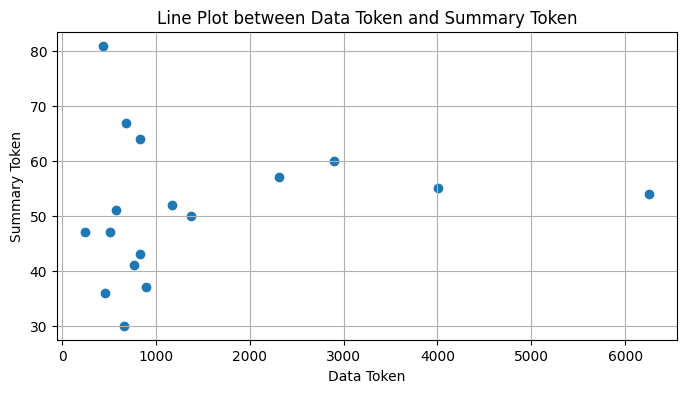

In [ ]:

# plot_line_graph(new_df)
plot_scatter_graph(df)

In [ ]:
rouge_score = calculate_rouge(reference_summary['Aryabhata'], summary_test)

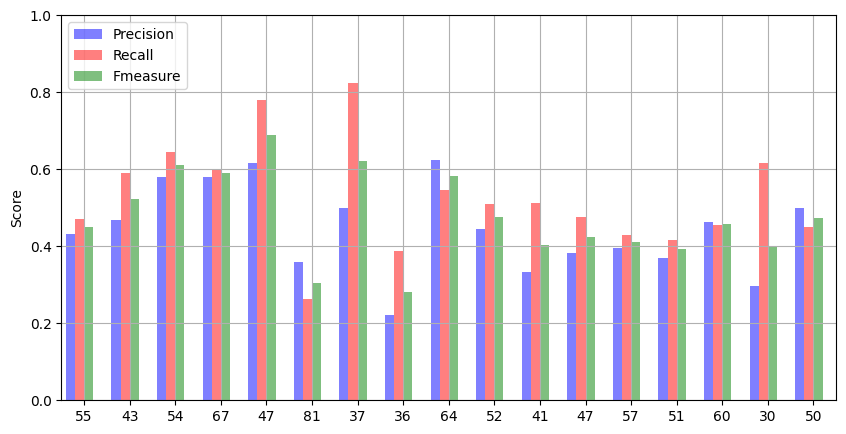

In [ ]:
plot_score_graph(df)